# Lesson: Anomaly Detection - DENSITY-BASED CLUSTERING

<hr style="border:2px solid gray">

- Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids. Normal data points occur around a dense neighborhood and abnormalities are far away.

- Using density based clustering, like DBSCAN, we can design the model such that the data points that do not fall into a cluster are the anomalies.

# Steps
1. Select variables you want to cluster: 
> `df = df[["col1", "col2"]]`

2. Convert to array & dtype float: 
> `np_array = df.values.astype("float32", copy = False)`

3. Scale to standard normal:
> `scaler = StandardScaler().fit(np_array) np_array = scaler.transform(np_array)`

4. Create DBSCAN object and fit: 
> `dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)`

5. Extract labels: 
> `labels = dbsc.labels_`

6. Add labels back to original dataframe:
> `df['labels'] = labels`

7. Explore:
> `df.labels.value_counts() sns.scatterplot(df.col1, df.col2, hue=df.labels)`

In [46]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import itertools

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler


# Acquire

In [ ]:
def get_connection_url(db, username=os.getenv('sqlUSER'), host=os.getenv('sqlHOST'), password=os.getenv('sqlPSWD')):
    """
    This function will:
    - take username, pswd, host credentials from imported env module
    - output a formatted connection_url
    """
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'


In [ ]:
from env import host, user, password

def get_connection_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [ ]:
url = get_connection_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()

In [ ]:
df.info()

___

# Follow the Steps

# Step 1: Select variables you want to cluster

In [ ]:
# Cluster on all or a selected subset of features
grocery_milk_fresh = df[['Grocery', 'Milk', 'Fresh']]
grocery_milk_fresh.head()

# Step 2: Convert to array & dtype float

In [ ]:
df.info()

In [ ]:
grocery_milk_fresh.iloc[0]

In [ ]:
grocery_milk_fresh.values.astype("float32", copy=False)[0]

In [ ]:
#convert to an array and turn into float
np_array = grocery_milk_fresh.values.astype("float32", copy=False)

# Step 3: Scale to standard normal

In [ ]:
# MAKE the scaler
mms = MinMaxScaler()

# FIT/transform the scaler
gmf_scaled = mms.fit_transform(np_array)

gmf_scaled

In [ ]:
grocery_milk_fresh.columns

In [ ]:
["Scaled_"+column for column in grocery_milk_fresh.columns]

In [ ]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_"+column for column in grocery_milk_fresh.columns]

In [ ]:
# Save a copy of the original dataframe
original_df = df.copy()

In [ ]:
# Create a dataframe containing the scaled array of values
scaled_df = pd.DataFrame(gmf_scaled, columns=scaled_columns)

In [ ]:
scaled_df

In [ ]:
df.merge(scaled_df, on=df.index)

In [ ]:
# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [ ]:
df.head()

# Step 4: Create <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a> object and fit

#### Construct a DBSCAN object that requires a **minimum of 20 data points** in a neighborhood of **radius 0.1** to be considered a core point.

In [ ]:
# Make the object
dbsc = DBSCAN(eps = .1, min_samples=20)

# Fit the object
dbsc.fit(gmf_scaled)

# Step 5: Extract labels


**NOTE:**
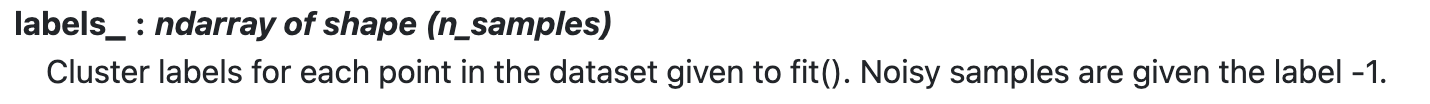

**Note NOTE:**
Clusters will be identified as an index: `[0,1,2,3,...]`

<a href = "https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31">Interesting article</a> diving deeper into using DBSCAN to create clusters as well as identify anomalies.

In [ ]:
dbsc.labels_

# Step 6: Add labels back to original dataframe

In [ ]:
# Assign the cluster labels
df['gmf_labels'] = dbsc.labels_

In [ ]:
#see what this dataframe looks like
df.sample(5)

# Step 7: Explore

<div class="alert alert-block alert-info">
<b>Remember:</b> 
<br>
    
- <b>-1</b>: refers to data that does <u>not</u> fall into a cluster
- <b>0</b>: refers to data that does fall into the first cluster
</div>

In [ ]:
#let's see what labels holds
df.gmf_labels.value_counts()

In [ ]:
df.head()

In [ ]:
for combination in itertools.combinations(grocery_milk_fresh.columns,2):
    print(combination)

In [ ]:
combination[0]

In [ ]:
for combination in itertools.combinations(grocery_milk_fresh.columns, 2):
    sns.scatterplot(df[combination[0]], df[combination[1]], hue=df.gmf_labels)
    plt.title(f"{combination[0]} by {combination[1]} Cluster vs. Outliers")
    plt.show()
